In [ ]:
!pip install japanize-matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 84.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
import numpy as np

# ソフトマックス回帰（softmax regression）

ロジスティック回帰の多クラス版

出力関数として，シグモイド関数ではなくソフトマックス関数を用いる．

## ソフトマックス関数とは
$K$個の分類問題を考える．

この時，ソフトマックス関数は$i$番目に分類される確率を与える．

$$
f(x_i) = \frac{exp(x_i)}{\sum_{k=1}^{K}exp(x_k)} \\
\, \\
i = 1, 2, \cdots, K
$$

画像データを用いた，{犬，猫，鳥，人}の４分類問題を考える．

この時，ソフトマックス関数の出力値は次のようになる．

１番目のデータサンプルによる予測値: {犬である確率，猫である確率，鳥である確率，人である確率} \
２番目のデータサンプルによる予測値: {犬である確率，猫である確率，鳥である確率，人である確率}} \
３番目のデータサンプルによる予測値: {犬である確率，猫である確率，鳥である確率，人である確率} \
. \
. \
.

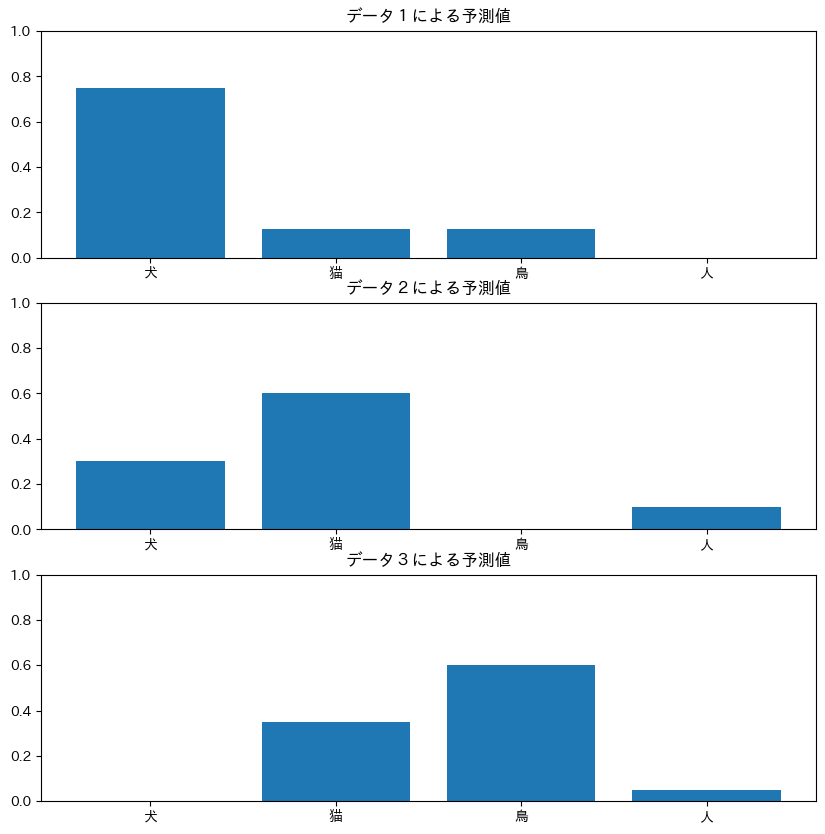

In [ ]:
#@title ソフトマックス関数の出力
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

fig ,ax = plt.subplots(3, 1, figsize=(10,10))

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax1.set_title("データ１による予測値")
ax1.set_ylim(0, 1)
ax2.set_title("データ２による予測値")
ax2.set_ylim(0, 1)
ax3.set_title("データ３による予測値")
ax3.set_ylim(0, 1)
ax1.bar(["犬", "猫", "鳥", "人"], [0.75, 0.125, 0.125, 0])
ax2.bar(["犬", "猫", "鳥", "人"], [0.3, 0.6, 0, 0.1])
ax3.bar(["犬", "猫", "鳥", "人"], [0., 0.35, 0.6, 0.05])
plt.show()

## ソフトマックス回帰モデル

$N$次元，$M$個のデータを考える．（今回は多クラス分類問題を考えるので，yは$\{0, 1\}^K$の値を取る．）

注意するのは，パラメータ$W$と$B$，教師データ$Y$が行列になっていること．

$k$列の重みは$k$番目の分類ラベルに対するパラメータ．
$$
\begin{align}
X &=
\begin{pmatrix}
    \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N
\end{pmatrix} \\
W &=
\begin{pmatrix}
    \mathbf{w}_1 \\
    \mathbf{w}_2 \\
    \vdots \\
    \mathbf{w}_N
\end{pmatrix}
=
\begin{pmatrix}
    w_{11} & w_{12} & \cdots & w_{1K} \\
    w_{21} & w_{22} & \cdots & w_{2K} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{N1} & w_{N2} & \cdots & w_{NK}
\end{pmatrix} \\
B &=
\begin{pmatrix}
    \mathbf{b} \\
    \mathbf{b} \\
    \vdots \\
    \mathbf{b}
\end{pmatrix}
=
\begin{pmatrix}
    b_{1} & b_{2} & \cdots & b_{K} \\
    b_{1} & b_{2} & \cdots & b_{K} \\
    \vdots & \vdots & \ddots & \vdots \\
    b_{1} & b_{2} & \cdots & b_{K}
\end{pmatrix} \\
Y &=
\begin{pmatrix}
    \mathbf{y}_1 \\
    \mathbf{y}_2 \\
    \vdots \\
    \mathbf{y}_M
\end{pmatrix}
=
\begin{pmatrix}
    y_{11} & y_{12} & \cdots & y_{1K} \\
    y_{21} & y_{22} & \cdots & y_{2K} \\
    \vdots & \vdots & \ddots & \vdots \\
    y_{M1} & y_{M2} & \cdots & y_{MK}
\end{pmatrix} \\
\end{align}
$$

まずは，いつも通り重み付き線形和を考える．

$$
Z = XW+B = \begin{pmatrix}
    \mathbf{z}_1 & \mathbf{z}_2 & \cdots & \mathbf{z}_K
\end{pmatrix} \\
z_k =
\begin{pmatrix}
    z_{m1} \\
    z_{m2} \\
    \vdots \\
    z_{mk}
\end{pmatrix}
$$
$z_m$は$m$番目のデータの各ラベリングに対応する重み付き線形和を表す．

これの各行について，ソフトマックス関数で確率の値に変換してあげれば良い．

つまり，

$$
f(x_i) = \frac{exp(x_i)}{\sum_{k=1}^{K}exp(x_k)} \\
\, \\
i = 1, 2, \cdots, K
$$

の式を用いて，

$$
f(z_{mi}) = \frac{exp(z_{mi})}{\sum_{k=1}^{K}exp(z_{mk})} \\
\, \\
i = 1, 2, \cdots, K
$$

と変換してあげれば良い．

まずは，ここまで実装してみよう．

In [ ]:
# まずは，__init__()を定義する
class SoftmaxRegression():
    def __init__(self, in_dim, out_dim):
        """
        パラメータの初期化を行う．
        in_dim: 入力次元数
        out_dim: 出力次元数（ラベルの数）
        """

        self.W = # WRITE ME
        self.b = # WRITE ME

In [ ]:
# softmax関数を定義
def softmax(x, axis=1):
    # expのoverflowを防ぐ
    # keepdims: 次元を合わせる，max関数を使うと次元が減る（shapeが変わる）のでそれを避ける．
    x -= x.max(axis, keepdims=True)
    x_exp = np.exp(x)
    return x_exp / x_exp.sum(axis, keepdims=True)

# predictメソッドを定義
class SoftmaxRegression():
    def __init__(self, in_dim, out_dim):
        """
        パラメータの初期化を行う．
        in_dim: 入力次元数
        out_dim: 出力次元数（ラベルの数）
        """
        self.W = np.random.uniform(low=-0.08, high=0.08, size=(in_dim, out_dim)).astype('float32')
        self.b = np.zeros(shape=(1, out_dim)).astype('float32')

    def predict(self, x):
        # WRITE ME

In [ ]:
# 実験
# １０次元３つのデータサンプルを用いて５クラス分類するタスクを想定
m_data = 3
n_dim = 10
k_class = 5

smr = SoftmaxRegression(in_dim=n_dim, out_dim=k_class)
X = np.random.randn(m_data, n_dim)
print(X)
print(smr.predict(X))

[[-0.49827185 -0.08240401  0.00748006  0.57195789  0.78795351 -1.04867566
   0.39374811 -0.60825172 -0.62753085 -0.82737652]
 [ 0.55528744 -0.74722577  0.39145017 -0.37241411  0.73640783 -0.764149
   1.42486007  0.29717808 -0.42754353  0.2752091 ]
 [-0.23967904  0.18118756  0.45789938  1.26275845  0.04420705 -0.79464115
  -0.67091651 -0.55676466  0.60521147 -0.89094829]]
[[0.21213517 0.19624043 0.19435166 0.20149717 0.19577556]
 [0.20457791 0.18591761 0.21691898 0.1726519  0.21993359]
 [0.21859891 0.18361581 0.19636797 0.20590102 0.19551629]]


## 誤差の計算

モデルの出力値が得られたので，あとは誤差を計算して勾配降下法によってパラメータを更新しよう．

今回も誤差関数としてクロスエントロピー誤差を用いる．

クロスエントロピー誤差
$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}(\mathbf{w}, \mathbf{b}))
$$

これを実装しよう．

### hint

わからなければ，行列で書き出してみよう．

そして，どことどこが掛け算されて，どことどこが足し算されているかを考えよう．

In [ ]:
# log関数を定義
def np_log(x):
    """
    log関数のオーバーフローを防ぐ実装，clipで値を制限
    """
    return np.log(np.clip(x, 1e-10, 1e+10))

# cost関数を定義
class SoftmaxRegression():
    def __init__(self, in_dim, out_dim):
        """
        パラメータの初期化を行う．
        in_dim: 入力次元数
        out_dim: 出力次元数（ラベルの数）
        """
        self.W = np.random.uniform(low=-0.08, high=0.08, size=(in_dim, out_dim)).astype('float32')
        self.b = np.zeros(shape=(1, out_dim)).astype('float32')

    def predict(self, x):
        Z = x @ self.W + self.b
        return softmax(Z)

    def cost(self, y_true, y_pred):
        """
        y_true: 真の値
        y_pred: ソフトマックス後の予測値（確率値）
        """
        # WRITE ME

In [ ]:
# 実験
# １０次元３つのデータサンプルを用いて５クラス分類するタスクを想定
m_data = 3
n_dim = 10
k_class = 5

smr = SoftmaxRegression(in_dim=n_dim, out_dim=k_class)

X = np.random.randn(m_data, n_dim)
Y = np.array([[0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0],
              [1, 0, 0, 0, 0]])
Y_pred = smr.predict(X)
print(smr.cost(Y, Y_pred))

1.648237156370679


## 勾配の計算
今回の勾配の計算はかなり難易度が高い（複雑なだけではあるが）ので，とりあえず結果だけわかれば大丈夫です．
（知りたい方は下に書いてあるので参考にしてください．）

m番目，n次元目にかかる，iクラスへのパラメータ

$$
\frac{∂J}{∂w_{ni}} = -\frac{1}{M}\sum_{m=1}^{M}(p_{mi} - \hat{p}_{mi})x_{mn}
$$

$b$はまたも，$x_{mn} = 1$とした場合と同様で，

$$
\frac{∂J}{∂b} = -\frac{1}{M}\sum_{m=1}^{M}(p_{mi} - \hat{p}_{mi})
$$

これを各パラメータについて計算して，forループで計算しても良い．

### 行列形式（授業ではこちら）

$$
Δ = Y - \hat{Y} \\
\frac{∂J}{∂W} = -\frac{1}{M}X^TΔ \\
\frac{∂J}{∂b} =  -\bar{Δ}
$$

※$\bar{Δ}$はデータの定義に基づくと，$Δ$の列ごとの平均である．

In [ ]:
a = np.array([[1,1,1,1,1],
             [2,2,2,2,2],
             [1,2,3,4,5]])
a.mean(axis=0)

array([1.33333333, 1.66666667, 2.        , 2.33333333, 2.66666667])

In [ ]:
# 上記の勾配に基づいて，パラメータを更新するupdate関数を定義しよう
class SoftmaxRegression():
    def __init__(self, in_dim, out_dim):
        """
        パラメータの初期化を行う．
        in_dim: 入力次元数
        out_dim: 出力次元数（ラベルの数）
        """
        self.W = np.random.uniform(low=-0.08, high=0.08, size=(in_dim, out_dim)).astype('float32')
        self.b = np.zeros(shape=(1, out_dim)).astype('float32')

    def predict(self, x):
        Z = x @ self.W + self.b
        return softmax(Z)

    def cost(self, y_true, y_pred):
        """
        y_true: 真の値
        y_pred: ソフトマックス後の予測値（確率値）
        """
        # WRITE ME
        J = (- y_true * np_log(y_pred)).sum(axis=1).mean()
        return J
    def update(self, X, Y, alpha):
        # WRITEME

        # 予測値の計算
        Y_hat = # WRITE ME

        # 誤差の計算
        delta =  # WRITE ME

        # 勾配の計算
        dW =  # WRITE ME
        db =  # WRITE ME

        # パラメータの更新
        self.W -=  # WRITE ME
        self.b -=  # WRITE ME


        return self.cost(Y, self.predict(X))

11490434/11490434 [==============================] - 0s 0us/step


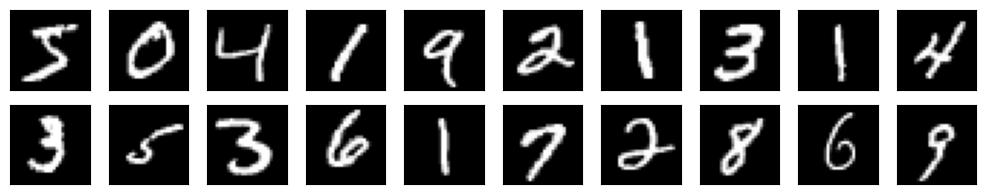

In [ ]:
# mnistデータセットを学習させる
# mnist: 手書き数字画像のデータセット
from keras.datasets import mnist
(x_mnist_1, y_mnist_1), (x_mnist_2, y_mnist_2) = mnist.load_data()

x_mnist = np.r_[x_mnist_1, x_mnist_2]
y_mnist = np.r_[y_mnist_1, y_mnist_2]

fig = plt.figure(figsize=(10, 10))

for i in range(20):
    x = x_mnist[i]
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x, 'gray')
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
# データの前処理：正規化や一次元化したりする．
# データの分割；今回は訓練データとテストデータに分け，さらに訓練データを検証用データと訓練データに分けた．
from sklearn.model_selection import train_test_split
x_mnist = x_mnist.astype('float32') / 255.
y_mnist = np.eye(N=10)[y_mnist.astype('int32').flatten()]

x_mnist=x_mnist.reshape(x_mnist.shape[0],-1)

x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(x_mnist, y_mnist, test_size=10000)
x_train_mnist, x_valid_mnist, y_train_mnist, y_valid_mnist = train_test_split(x_train_mnist, y_train_mnist, test_size=10000)

In [ ]:
print(x_mnist.shape)
print(x_train_mnist.shape)
print(y_train_mnist.shape)

(70000, 784)
(50000, 784)
(50000, 10)


In [ ]:
# 学習
# モデルのインスタンスを生成
from sklearn.metrics import accuracy_score
sreg = SoftmaxRegression(in_dim=x_mnist.shape[1], out_dim=y_mnist.shape[1])

# バッチサイズを指定
batch_size = 500 #X_train.shape[0]

# 学習率を指定
alpha = 0.001
# alpha = 0.00001

# epoch数を指定
epochs = 1000

# 乱数シードを固定
np.random.seed(1)

# 描画のための配列を用意
iter = int(x_train_mnist.shape[0]/batch_size)
_ = [i+1 for i in range(epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(x_train_mnist.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = x_train_mnist[idx][:]
        _y = y_train_mnist[idx][:]
        c = sreg.update(_X, _y, alpha=alpha)
    cost_J.append(np_log(c))
    if epoch % 10 == 0:
        print("EPOCH: {}, cost: {}, accuracy: {}".format(epoch, c, accuracy_score(sreg.predict(x_valid_mnist).argmax(axis=1), y_valid_mnist.argmax(axis=1))))
    if epoch == 500 :
         alpha /= 1000

NameError: ignored

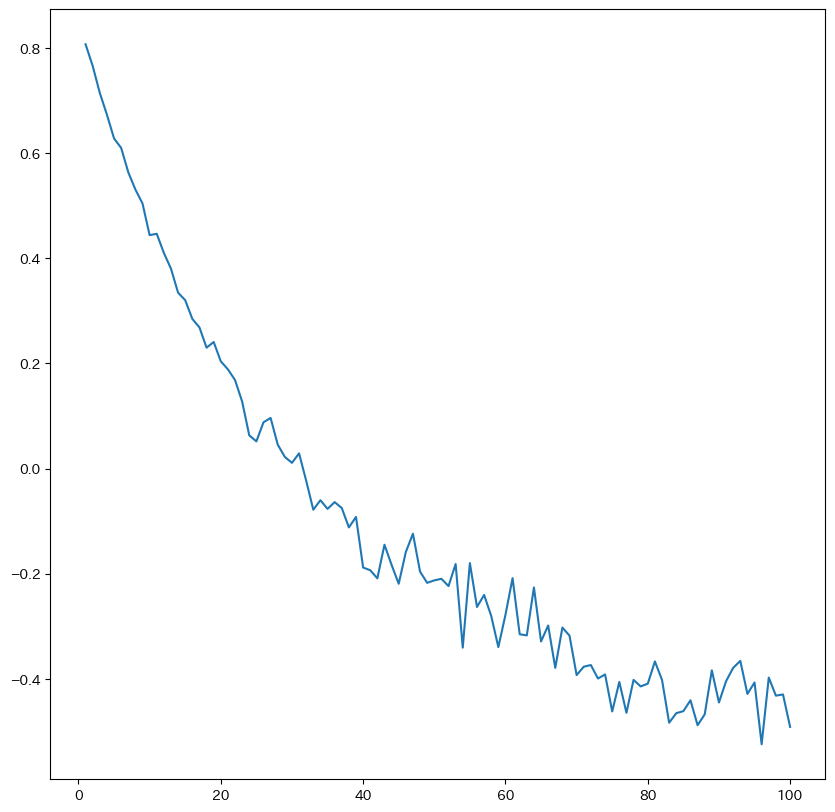

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(_, cost_J)
plt.show()

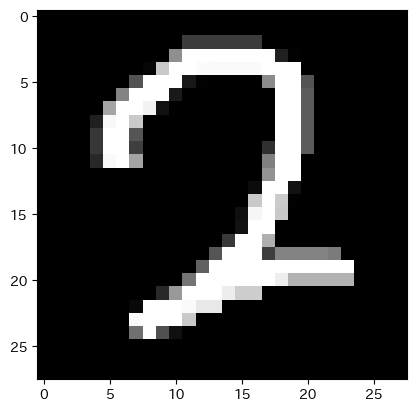

この画像は 2 です


In [ ]:
# 実際の手書き数字を使って予測してみる．
import cv2
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/machine_learning/logistic_regression/samples/super2.png"
img = cv2.imread(path)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = (255 - img)/255
plt.imshow(img, cmap="gray")
plt.show()
img_flat = img.reshape(784, -1).flatten()
print("この画像は", sreg.predict(img_flat).argmax(), "です")

In [ ]:
from sklearn.linear_model import LogisticRegression

# multi_logreg = LogisticRegression(solver="lbfgs", multi_class="auto") # softmax
# multi_logreg = LogisticRegression(solver="newton-cg",multi_class="auto") # softmax
# multi_logreg = LogisticRegression(solver="sag", multi_class="auto") # softmax: 確率的勾配降下法
# multi_logreg = LogisticRegression(solver="saga",multi_class="auto") # softmax
multi_logreg = LogisticRegression(solver="liblinear", multi_class="auto") # ovr strategy

print(multi_logreg)
# fit メソッドで学習させよう
# WRITE ME

# モデル評価
print("test accuracy:", multi_logreg.score(x_test_mnist, y_test_mnist.argmax(axis=1)))

LogisticRegression(solver='liblinear')
test accuracy: 0.9179


In [ ]:
# predict メソッドで予測してみよう
# WRITE ME
print("この画像は", # WRITE ME, "です")

この画像は [3] です


## 勾配の計算（詳細）

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}(\mathbf{w}, \mathbf{b}))
$$

$n$次元目のカラムにかかる，$i$番目のクラス分類に使うパラメータについての偏微分を考える．

つまり，下記の偏微分を考える．

$$
\begin{align}
\frac{{\partial}J(\mathbf{w}, \mathbf{b})}{{\partial}w_{ni}}
\end{align}
$$

## 連鎖率
誤解を恐れずにいうと，複雑な関数の微分をできるだけスッキリと行う方法．

今回の関数を全て書き出すと，

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\frac{exp(X\mathbf{w}_k+\mathbf{b})}{\sum_{j=1}^{K}exp(X\mathbf{w}_j+\mathbf{b})})
$$

という形になり，$w_{ni}$での微分は結構やりたくない。。。（個人の感想です）

もちろん，一つずつ書き下して$w_{ni}$で微分しても答えは出るのでそれでも大丈夫．

その場合は連鎖率の話は出てこないので，そちらの方がわかりやすい場合もある！

さて，それではここから連鎖率を使って簡単に書き換える．

### 連鎖率（１変数の場合）
多変数関数の連鎖律（Chain Rule）について簡単に解説する．

$f$を$u$の関数とする．そして，$u$は$x$の関数であるとする．
この時，

$$
\frac{df}{dx} = \frac{df}{du}\frac{du}{dx}
$$

という形で微分できる．

（例）次の関数を微分しよう．
$$
f(x) = (5x+4)^{3}
$$

（方法１）普通に展開して微分する．
$$
\begin{align}
f(x) &= (5x+4)^{3} \\
&= 125 x^3 + 300 x^2 + 240 x + 64 \\
\frac{df}{dx} &= 3 \times 125 x^2 + 2 \times 300 x + 240\\
&= 725x^2+600x+240
\end{align}
$$

（方法２）連鎖律を用いて微分する．
$$
\begin{align}
f(x) &= (5x+4)^{3} \\
u &= 5x+4\\
\end{align}
$$
とおくと，
\begin{align}
f(u) &= u^{3} \\
u &= 5x+4\\
\frac{df}{du} & = 3u^2 \\
\frac{du}{dx} & = 5
\end{align}
であり，連鎖律の式から
$$
\frac{df}{dx} = \frac{df}{du}\frac{du}{dx}\\
= 3u^2 \times 5 \\
= 15(5x+4)^2
$$

と求まる．どっちが楽かに応じて使い分ければ良い．

（展開してやりたい人はどうぞ、、、僕はあまりやりたくありません、、、笑）

### 連鎖律（２変数の場合）

$f$を$u, v$の関数とする．そして，$u, v$はどちらも$x$の関数であるとする．

この時，

$$
\frac{∂f}{∂x} = \frac{∂f}{∂u}\frac{∂u}{∂x}+\frac{∂f}{∂v}\frac{∂v}{∂x} \\
$$

である．

何が変数になっていて，どれが引数なのかを意識しよう．

（例）
$$
f(x) = \frac{e^x}{log(x)} \\
\frac{∂f}{∂x} = \frac{u}{v} \\
\frac{∂f}{∂u} = \frac{1}{v} \\
\frac{∂u}{∂x} = e^x \\
\frac{∂f}{∂v} = -\frac{u}{v^2} \\
\frac{∂v}{∂x} = \frac{1}{x}
$$
より，
$$
\begin{align}
f(x) &= \frac{e^x}{log(x)} \\
\frac{∂f}{∂x} &= \frac{∂f}{∂u}\frac{∂u}{∂x}+\frac{∂f}{∂v}\frac{∂v}{∂x} \\
&= \frac{1}{v}e^x+(-\frac{u}{v^2})\frac{1}{x} \\
&= \frac{1}{log(x)}e^x-\frac{e^x}{log(x)^2}\frac{1}{x}
\end{align}
$$
### 連鎖律（多変数の場合）

$f$を$z_1, z_2, ..., z_n$の関数とする．そして，$z_1, z_2, ..., z_n$はいずれも$x$の関数であるとする．

この時，

$$
\frac{∂f}{∂x} =\sum_{i=1}^{n} \frac{∂f}{∂z_i}\frac{∂z_i}{∂x} \\
$$

である．

後に使って，勾配を導出するため例は割愛．


## 勾配の計算

さて，話を戻そう．

下記の偏微分を考える．

$$
\begin{align}
\frac{{\partial}J(\mathbf{w}, \mathbf{b})}{{\partial}w_{ni}}
\end{align}
$$

だが，これを直接求めるのは少し骨が折れる。。。

だから，先ほどのように連鎖律を上手に使って求めてみよう．

$\hat{p}_{mk} = f_{softmax}(z_1, z_2, z_3, ... , z_K), $

$z_k=w_{1k}\mathbf{x}_1+w_{2k}\mathbf{x}_2+...+w_{Nk}\mathbf{x}_N$

とすると，

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}) = J(\hat{p}_{m1}, \hat{p}_{m2}, ..., \hat{p}_{mK}) \\
\end{align}
$$

より，

$$
\frac{∂J(\mathbf{w}, \mathbf{b})}{∂w_{ni}} = \frac{∂J(\hat{p}_{m1}, \hat{p}_{m2}, ..., \hat{p}_{mK})}{∂w_{ni}} \\
$$
であるから，連鎖律を用いて，

$$
\frac{∂J(\mathbf{w}, \mathbf{b})}{∂w_{ni}} = \frac{∂J(\hat{p}_{m1}, \hat{p}_{m2}, ..., \hat{p}_{mK})}{∂w_{ni}} = \sum_{a=1}^{K}\frac{∂J(\hat{p}_{m1}, \hat{p}_{m2}, ..., \hat{p}_{mK})}{∂\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂w_{ni}}\\
$$
さらに，
$\hat{p}_{mk} = f_{softmax}(z_1, z_2, z_3, ... , z_K), $から，

$$
\frac{∂\hat{p}_{ma}}{∂w_{ni}} = \frac{∂f_{softmax}(z_1, z_2, z_3, ... , z_K)_{ma}}{∂w_{ni}}
$$
であるから，$p$は$z_b$の関数であるとみなせて，$（b=1,...,K）$

$$
\frac{∂\hat{p}_{ma}}{∂w_{ni}} = \sum_{b=1}^{K}\frac{∂\hat{p}_{ma}}{∂z_{b}}\frac{∂z_{b}}{∂w_{ni}}
$$

まとめて書くと，（見やすさのため，$J(\mathbf{w}, \mathbf{b})=J(\hat{p}_{m1}, \hat{p}_{m2}, ..., \hat{p}_{mK})=J$とおいた）

$$
\frac{∂J}{∂w_{ni}} = \sum_{a=1}^{K}\frac{∂J}{∂\hat{p}_{ma}}\sum_{b=1}^{K}\frac{∂\hat{p}_{ma}}{∂z_{b}}\frac{∂z_{b}}{∂w_{ni}}
$$

これが簡単なのだろうか？？

→少なくとも僕は簡単だと感じます．

→計算してみるとわかる．


まずは，
$$
\frac{∂z_{b}}{∂w_{ni}}
$$
を求めよう．

$z_b$はクラスbへの線形和であるから

$$
\frac{∂z_{b}}{∂w_{ni}} = \frac{∂}{∂w_{ni}}(w_{1b}x_{m1}+w_{2b}x_{m2}+\cdots+w_{Nb}x_{mN})
$$

これをみると，$b \ne i$の時は微分の値が0になることがわかるだろうか？

つまり，
$$
\sum_{b=1}^{K}\frac{∂\hat{p}_{ma}}{∂z_{b}}\frac{∂z_{b}}{∂w_{ni}}
$$
の値のほとんどが0になるということである．書き下すと次のようになる．

$$
\sum_{b=1}^{K}\frac{∂\hat{p}_{ma}}{∂z_{b}}\frac{∂z_{b}}{∂w_{ni}}
= \frac{∂\hat{p}_{ma}}{∂z_{1}}\frac{∂z_{1}}{∂w_{ni}} + \frac{∂\hat{p}_{ma}}{∂z_{2}}\frac{∂z_{2}}{∂w_{ni}}+\cdots+\frac{∂\hat{p}_{ma}}{∂z_{i}}\frac{∂z_{i}}{∂w_{ni}}+\cdots+\frac{∂\hat{p}_{ma}}{∂z_{K}}\frac{∂z_{K}}{∂w_{ni}} \\
= \frac{∂\hat{p}_{ma}}{∂z_{1}}\times 0 + \frac{∂\hat{p}_{ma}}{∂z_{2}}\times 0+\cdots+\frac{∂\hat{p}_{ma}}{∂z_{i}}\frac{∂z_{i}}{∂w_{ni}}+\cdots+\frac{∂\hat{p}_{ma}}{∂z_{K}}\times 0 \\
= \frac{∂\hat{p}_{ma}}{∂z_{i}}\frac{∂z_{i}}{∂w_{ni}}
$$

ここで，
$$
\frac{∂z_{i}}{∂w_{ni}} = x_{mn}
$$
なので，
$$
\sum_{b=1}^{K}\frac{∂\hat{p}_{ma}}{∂z_{b}}\frac{∂z_{b}}{∂w_{ni}} = \frac{∂\hat{p}_{ma}}{∂z_{i}} x_{mn}
$$

であり，
$$
\frac{∂J}{∂w_{ni}} = \sum_{a=1}^{K}\frac{∂J}{∂\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} x_{mn}
$$
実に気持ちよく消えてくれた．

それでは，次に

$$
\sum_{a=1}^{K}\frac{∂J}{∂\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}}
$$

この部分を求める．

ここが若干大変だが，頑張ってほしい．

まず，
$$
\frac{∂J}{∂\hat{p}_{ma}}
$$
について．

$$
\frac{∂J}{∂\hat{p}_{ma}} = \frac{∂}{∂\hat{p}_{ma}}(-\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}))
= -\frac{1}{M}\sum_{m=1}^{M} \frac{∂}{∂\hat{p}_{ma}}(\sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk})) \\
=  -\frac{1}{M}\sum_{m=1}^{M}\frac{∂}{∂\hat{p}_{ma}}(p_{m1}log(\hat{p}_{m1})+p_{m2}log(\hat{p}_{m2})+\cdots+p_{ma}log(\hat{p}_{ma})+\cdots+p_{mK}log(\hat{p}_{mK}))
$$

であり，やはりこれも$\hat{p}_{ma}$に関係ない項は０になるので，

$$
\frac{∂J}{∂\hat{p}_{ma}} =  -\frac{1}{M}\sum_{m=1}^{M}\frac{∂}{∂\hat{p}_{ma}}(p_{m1}log(\hat{p}_{m1})+p_{m2}log(\hat{p}_{m2})+\cdots+p_{ma}log(\hat{p}_{ma})+\cdots+p_{mK}log(\hat{p}_{mK})) \\
=  -\frac{1}{M}\sum_{m=1}^{M}(p_{m1} \times 0 + p_{m2} \times 0 + \cdots + p_{ma} \times \frac{∂}{∂\hat{p}_{ma}}(log(\hat{p}_{ma})) + \cdots + p_{mK} \times 0)\\
=  -\frac{1}{M}\sum_{m=1}^{M}p_{ma}\frac{∂}{∂\hat{p}_{ma}}(log(\hat{p}_{ma}))
$$

ここで，対数関数の微分を用いて（ロジスティック回帰の資料を参照 or Google先生に聞いてください），

$$
\frac{∂J}{∂\hat{p}_{ma}} =  -\frac{1}{M}\sum_{m=1}^{M}\frac{p_{ma}}{\hat{p}_{ma}}
$$

となる．

ここまでをまとめると，

$$
\frac{∂J}{∂w_{ni}} =  -\frac{1}{M}\sum_{m=1}^{M}\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} x_{mn}
$$

となる．

次に，

$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}}
$$
を求める．

とりあえず，書き下してみよう．

$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} \\
= \frac{p_{m1}}{\hat{p}_{m1}}\frac{∂\hat{p}_{m1}}{∂z_{i}}+\frac{p_{m2}}{\hat{p}_{m2}}\frac{∂\hat{p}_{m2}}{∂z_{i}} + \cdots + \frac{p_{mi}}{\hat{p}_{mi}}\frac{∂\hat{p}_{mi}}{∂z_{i}} + \cdots + \frac{p_{mK}}{\hat{p}_{mK}}\frac{∂\hat{p}_{mK}}{∂z_{i}}
$$

ここで，softmax関数の微分が必要になるので，微分しておく．

そのための準備として，商の微分公式を導入しておく．

## 商の微分
呪文のように唱えて覚えるといい。笑
（僕が高校の時はそんな感じで覚えました。笑）

分母二乗して，（分子微分かける分母そのまま）引く（分子そのままかける分母微分）~

$$
\frac{d}{dx}\frac{f(x)}{g(x)} = \frac{f^{\prime}(x)g(x)-f(x)g^{\prime}(x)}{g(x)^2}
$$

というわけで，これを使ってsoftmax関数を微分する．

下記にsoftmax関数を再掲する．
なおこれは，クラスiに対する確率と見做せる．

又，簡単のため$\sum_{j=1}^{K}exp(x_j)=S$とおく
$$
f(x_1, x_2, ..., x_K)_i = \frac{exp(x_i)}{\sum_{j=1}^{K}exp(x_j)}= \frac{exp(x_i)}{S} \\
$$

それでは早速，微分してみると以下のような結果になる．（実際にやってみてほしい）

$$
\frac{\partial f}{\partial x_{l}} = \left\{
\begin{array}{l}
\frac{exp(x_i)(S-exp(x_i))}{S^2}（l=i） \\
\frac{-exp(x_i)exp(x_l)}{S^2}（l \ne i）
\end{array}
\right.
$$

これを使って，

$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} \\
= \frac{p_{m1}}{\hat{p}_{m1}}\frac{∂\hat{p}_{m1}}{∂z_{i}}+\frac{p_{m2}}{\hat{p}_{m2}}\frac{∂\hat{p}_{m2}}{∂z_{i}} + \cdots + \frac{p_{mi}}{\hat{p}_{mi}}\frac{∂\hat{p}_{mi}}{∂z_{i}} + \cdots + \frac{p_{mK}}{\hat{p}_{mK}}\frac{∂\hat{p}_{mK}}{∂z_{i}}
$$

を求める．

先ほどのsoftmax関数の微分値を使って，
$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} \\
= \frac{p_{m1}}{\hat{p}_{m1}}\frac{∂\hat{p}_{m1}}{∂z_{i}}+\frac{p_{m2}}{\hat{p}_{m2}}\frac{∂\hat{p}_{m2}}{∂z_{i}} + \cdots + \frac{p_{mi}}{\hat{p}_{mi}}\frac{∂\hat{p}_{mi}}{∂z_{i}} + \cdots + \frac{p_{mK}}{\hat{p}_{mK}}\frac{∂\hat{p}_{mK}}{∂z_{i}}\\
= \frac{p_{m1}}{\hat{p}_{m1}} \times \frac{-exp(z_1)exp(z_i)}{S^2} + \frac{p_{m2}}{\hat{p}_{m2}} \times \frac{-exp(z_2)exp(z_i)}{S^2} + \cdots \\
+ \frac{p_{mi}}{\hat{p}_{mi}} \times \frac{exp(z_i)(S-exp(z_i))}{S^2} + \cdots + \frac{p_{mK}}{\hat{p}_{mK}}\times \frac{-exp(z_K)exp(z_i)}{S^2}
$$

$$
\hat{p}_{mk} = \frac{exp(z_k)}{S}
$$
なので，

$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} \\
= \frac{p_{m1}}{\hat{p}_{m1}} \times \frac{-exp(z_1)exp(z_i)}{S^2} + \frac{p_{m2}}{\hat{p}_{m2}} \times \frac{-exp(z_2)exp(z_i)}{S^2} + \cdots \\
+ \frac{p_{mi}}{\hat{p}_{mi}} \times \frac{exp(z_i)(S-exp(z_i))}{S^2} + \cdots + \frac{p_{mK}}{\hat{p}_{mK}}\times \frac{-exp(z_K)exp(z_i)}{S^2} \\
= -p_{m1}\hat{p}_{mi}-p_{m2}\hat{p}_{mi}-\cdots+p_{mi}(1-\hat{p}_{mi})-\cdots-p_{mK}\hat{p}_{mi}\\
= p_{mi} - \hat{p}_{mi}\sum_{a=1}^{K}p_{ma}
$$

ここで，$p_{ma}$はa番目のクラスかどうかを表している教師データであり，その総和は1であるから

$$
\sum_{a=1}^{K}\frac{p_{ma}}{\hat{p}_{ma}}\frac{∂\hat{p}_{ma}}{∂z_{i}} \\
= p_{mi} - \hat{p}_{mi}\sum_{a=1}^{K}p_{ma}
= p_{mi} - \hat{p}_{mi}
$$

よって，

$$
\frac{∂J}{∂w_{ni}} = -\frac{1}{M}\sum_{m=1}^{M}(p_{mi} - \hat{p}_{mi})x_{mn}
$$

$b$はまたも，$x_{mn} = 1$とした場合と同様で，

$$
\frac{∂J}{∂b} = -\frac{1}{M}\sum_{m=1}^{M}(p_{mi} - \hat{p}_{mi})
$$